In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [28]:
## read data
data = pd.read_csv("data/nba_2013.csv")

In [29]:
data

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [4]:
data.season_end.value_counts()

season_end
2013    481
Name: count, dtype: int64

In [5]:
data.season.value_counts()

season
2013-2014    481
Name: count, dtype: int64

In [30]:
# drop 3 columns : season, season_end, player
data = data.drop("player", axis='columns')
data = data.drop("season", axis='columns')
data = data.drop("season_end", axis='columns')


In [7]:
data

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,TOT,63,0,847,66,141,0.468,4,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,OKC,81,20,1197,93,185,0.503,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,TOT,53,12,961,143,275,0.520,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,ORL,73,73,2552,464,1011,0.459,128,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,NOP,56,30,951,136,249,0.546,0,...,0.836,94,183,277,40,23,46,63,187,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,SG,20,PHI,72,16,1765,345,808,0.427,40,...,0.641,69,159,228,217,78,16,204,151,939
477,SG,28,LAL,64,9,1810,387,889,0.435,135,...,0.825,29,137,166,95,46,12,95,156,1144
478,PF,25,PHI,79,78,2718,582,1283,0.454,90,...,0.712,166,310,476,182,167,36,165,213,1417
479,C,21,CHA,82,3,1416,172,404,0.426,0,...,0.730,118,235,353,92,40,41,87,170,490


# 1. Reformat data

In [38]:
lbl = LabelEncoder()
data["bref_team_id"] = lbl.fit_transform(data['bref_team_id'])
data["pos"] = lbl.fit_transform(data['pos'])

In [47]:
data

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,5,23,28,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,0,0
1,Steven Adams,0,20,20,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,0,0
2,Jeff Adrien,3,27,28,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,0,0
3,Arron Afflalo,6,28,21,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,0,0
4,Alexis Ajinca,0,25,18,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,6,20,22,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,0,0
477,Nick Young,6,28,13,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,0,0
478,Thaddeus Young,3,25,22,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,0,0
479,Cody Zeller,0,21,3,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,0,0


In [9]:
data.bref_team_id.value_counts()

bref_team_id
28    63
18    18
20    17
13    16
29    16
12    16
0     15
6     15
8     15
23    15
10    15
15    15
19    15
2     15
24    15
5     14
26    14
1     14
17    14
30    14
21    13
3     13
16    13
14    13
22    12
7     12
9     12
11    12
4     11
27    10
25     9
Name: count, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pos           481 non-null    int32  
 1   age           481 non-null    int64  
 2   bref_team_id  481 non-null    int32  
 3   g             481 non-null    int64  
 4   gs            481 non-null    int64  
 5   mp            481 non-null    int64  
 6   fg            481 non-null    int64  
 7   fga           481 non-null    int64  
 8   fg.           479 non-null    float64
 9   x3p           481 non-null    int64  
 10  x3pa          481 non-null    int64  
 11  x3p.          414 non-null    float64
 12  x2p           481 non-null    int64  
 13  x2pa          481 non-null    int64  
 14  x2p.          478 non-null    float64
 15  efg.          479 non-null    float64
 16  ft            481 non-null    int64  
 17  fta           481 non-null    int64  
 18  ft.           461 non-null    

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
data.isna().any() 

pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
dtype: bool

In [33]:
data['fg.'] = data['fg.'].fillna(data['fg.'].mode()[0])
data['x3p.'] = data['x3p.'].fillna(data['x3p.'].mode()[0])
data['x2p.'] = data['x2p.'].fillna(data['x2p.'].mode()[0])
data['efg.'] = data['efg.'].fillna(data['efg.'].mode()[0])
data['ft.'] = data['ft.'].fillna(data['ft.'].mode()[0])


In [34]:
output_data = data['pts'].copy()
input_data = data[data.columns.drop('pts')]

# 2. Train test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.3,random_state=20)

In [45]:
cols = data.columns[data.columns != 'pos']
cols = cols[cols!="bref_team_id"]
cols = cols[cols!="pts"]

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train[cols])
X_test = scaler.transform(X_test[cols])

In [47]:
X_train

array([[0.35      , 0.57317073, 0.02439024, ..., 0.05936073, 0.09491525,
        0.3099631 ],
       [0.6       , 0.46341463, 0.15853659, ..., 0.1826484 , 0.25084746,
        0.34317343],
       [0.6       , 0.        , 0.        , ..., 0.00456621, 0.00338983,
        0.00369004],
       ...,
       [0.3       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3       , 0.08536585, 0.        , ..., 0.02283105, 0.01694915,
        0.06273063],
       [0.05      , 0.43902439, 0.        , ..., 0.00456621, 0.04745763,
        0.09594096]])

In [18]:
X_train = X_train[:,1:]
X_test = X_test[:,1:]

In [19]:
y_train

362     181
247     404
356       4
167     183
89      846
       ... 
412    1012
223      28
271       2
474      48
355      78
Name: pts, Length: 336, dtype: int64

# 3. Modeling

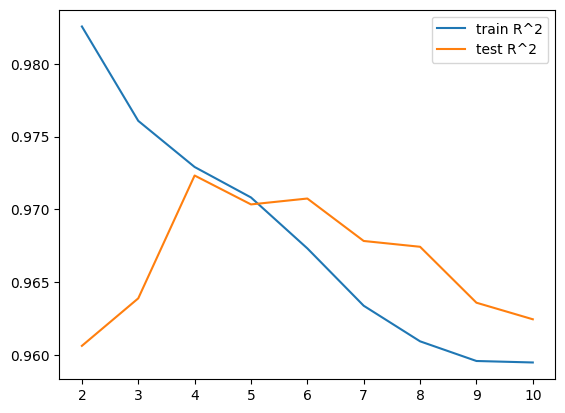

In [48]:
from sklearn.neighbors import KNeighborsRegressor
train_acc = []
test_acc = []
for k in range(2,11):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    tr_ac = neigh.score(X_train,y_train)
    te_ac = neigh.score(X_test,y_test)
    train_acc.append(tr_ac)
    test_acc.append(te_ac)

# plot accuracy to select k
from matplotlib import pyplot as plt
X_label = list(range(2,11))
plt.plot(X_label,train_acc,label='train R^2')
plt.plot(X_label,test_acc,label='test R^2')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error as mse

In [59]:
fk=4
# gt y=6, predict: y_p = 4, mse = (6-4)^2
neigh = KNeighborsRegressor(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(mse(y_test,preds))

52.929310344827584


In [58]:
fk=5
neigh = KNeighborsRegressor(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(mse(y_test,preds))

55.36551724137931


In [57]:
fk=1
neigh = KNeighborsRegressor(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(mse(y_test,preds))

73.51724137931035


In [56]:
from sklearn.metrics import mean_absolute_error as mse